In [1]:
from CSOWP_SR import *
from ExpressionTree import *

In [2]:
X = np.linspace(-5, 5, 1000)
X = np.c_[X, X]
y = X**2

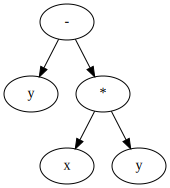

In [9]:
SR = SymbolicRegression(10, max_expression_size=3, max_population_size=100, max_island_count=10, random_const_range=(-10, 10))
SR.fit(np.c_[X], y, feature_names = ["x", "y"])
tree = SR.generate_expr(2)
display(tree.visualize_tree())

In [10]:
def ofunc(x, y):
    return y-(x*y)

In [19]:
ofunc(-5,12)

72

In [20]:
func = tree.toFunc(SR._operators, SR._functions, feature_names=SR._feature_names)
func(-5,12)

72

---

In [19]:
import sympy as smp
from sympy.parsing.sympy_parser import parse_expr

In [20]:
string = tree.toString(SR._operators, SR._functions)
string

'((x+x)-y)'

In [21]:
expr = smp.sympify(string)
expr

2*x - y

In [25]:
expr.free_symbols

{x, y}

In [23]:
string = ""
for i in list(expr.free_symbols):
    string = string + f"{i}, "
string

'y, x, '

In [9]:
symbols = smp.symbols(string)
symbols

ValueError: no symbols given

In [ ]:
x, y = smp.symbols("x, y")
func = smp.lambdify([x, y], expr)